In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
corona_dataset_csv=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nexus/nexus_p3/covid19_Confirmed_dataset.csv")
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [4]:
corona_dataset_csv.shape

(266, 104)

DATA PREPROCESSING

In [5]:
#Deleting the unwanted columns
df=corona_dataset_csv.drop(["Lat","Long"],axis=1,inplace=True)

In [6]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
#Aggregating the rows by the country
corona_dataset_aggregated=corona_dataset_csv.groupby("Country/Region").sum()

<ipython-input-7-5c404f268249>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corona_dataset_aggregated=corona_dataset_csv.groupby("Country/Region").sum()


In [8]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
corona_dataset_aggregated.shape

(187, 100)

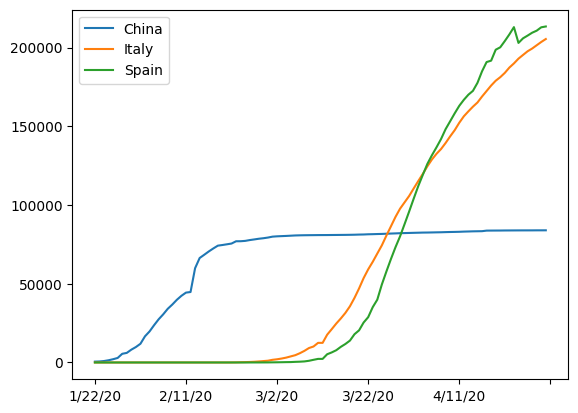

In [10]:
#Visualizing data related to a country[sample-3countries]
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Italy"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
plt.legend()

<Axes: >

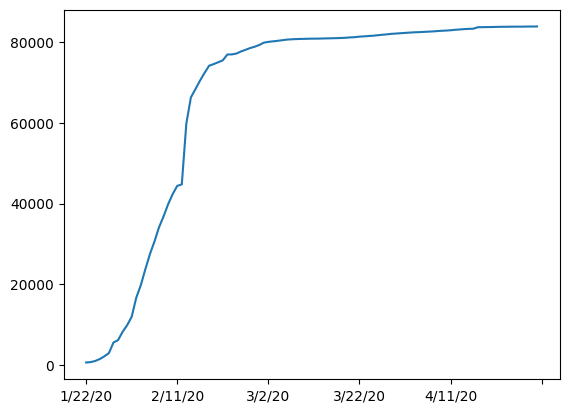

In [11]:
#Calculating a good measure
corona_dataset_aggregated.loc['China'].plot()

<Axes: >

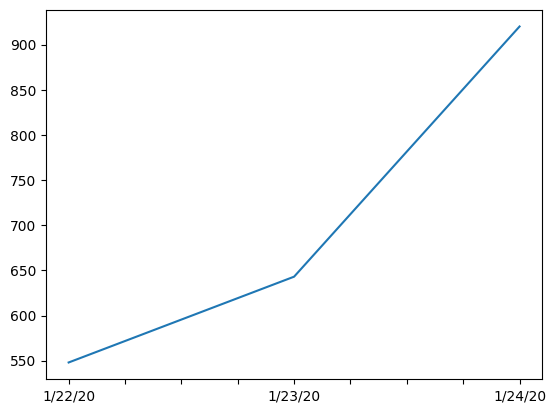

In [12]:
corona_dataset_aggregated.loc["China"][:3].plot()

Calculating the first derivative of the curve

<Axes: >

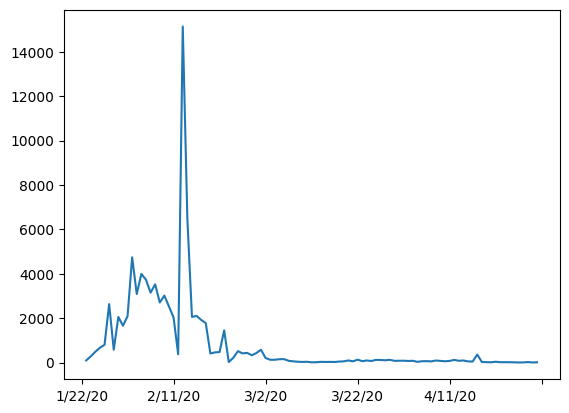

In [13]:
corona_dataset_aggregated.loc["China"].diff().plot()

In [17]:
#Finding maxmimum infection rate
print("China:",corona_dataset_aggregated.loc["China"].diff().max())
print("Italy:",corona_dataset_aggregated.loc["Italy"].diff().max())
print("Spain:",corona_dataset_aggregated.loc["Spain"].diff().max())

China: 15136.0
Italy: 6557.0
Spain: 9630.0


In [18]:
#Finding the maximum infection rate for all countries
countries=list(corona_dataset_aggregated.index)
max_infection_rates=[]
for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"]=max_infection_rates
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [19]:
#Creating new dataframe with only needed column
corona_data=pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [20]:
#Importing the dataset
happiness_report_csv=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/nexus/nexus_p3/worldwide_happiness_report.csv")
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
#Dropping the useless columns
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]
happiness_report_csv.drop(useless_cols,axis=1,inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [22]:
#Changing the indices of the dataframe
happiness_report_csv.set_index("Country or region",inplace=True)
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


Joining the two datasets(aggregated COVID-19 Dataset and new Wolrd_Happiness_Report Dataset)

In [23]:
data=corona_data.join(happiness_report_csv,how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


Correlation matrix  (analysis of the taken data)

In [24]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


from matplotlib import pyplot as plt
_df_0['max_infection_rate'].plot(kind='hist', bins=20, title='max_infection_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['GDP per capita'].plot(kind='hist', bins=20, title='GDP per capita')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Social support'].plot(kind='hist', bins=20, title='Social support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Healthy life expectancy'].plot(kind='hist', bins=20, title='Healthy life expectancy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='max_infection_rate', y='GDP per capita', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='GDP per capita', y='Social support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Social support', y='Healthy life expectancy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Healthy life expectancy', y='Freedom to make life choices', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['max_infection_rate'].plot(kind='line', figsize=(8, 4), title='max_infection_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['GDP per capita'].plot(kind='line', figsize=(8, 4), title='GDP per capita')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Social support'].plot(kind='line', figsize=(8, 4), title='Social support')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Healthy life expectancy'].plot(kind='line', figsize=(8, 4), title='Healthy life expectancy')
plt.gca().spines[['top', 'right']].set_visible(False)

 Visualization of the results

In [25]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


Plotting GDP vs maximum Infection rate

<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

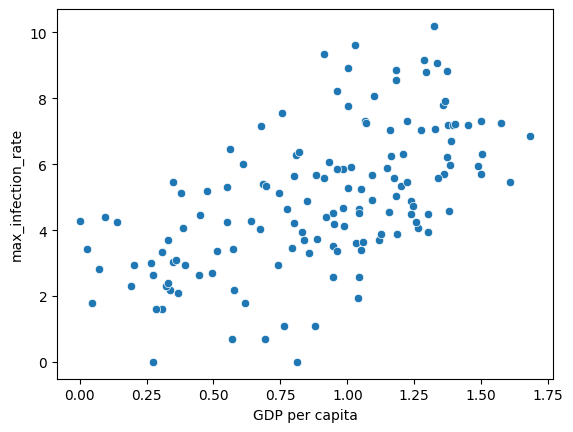

In [31]:
x=data["GDP per capita"]
y=data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

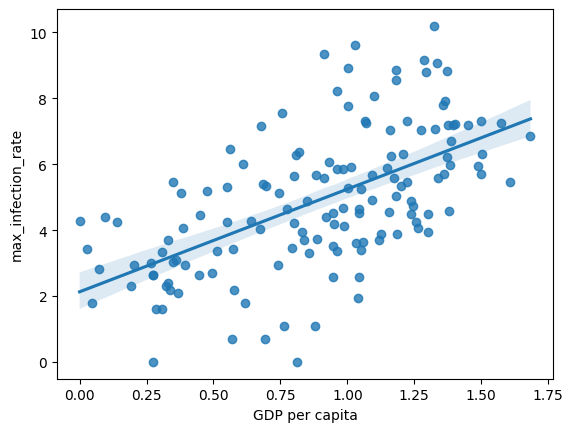

In [32]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

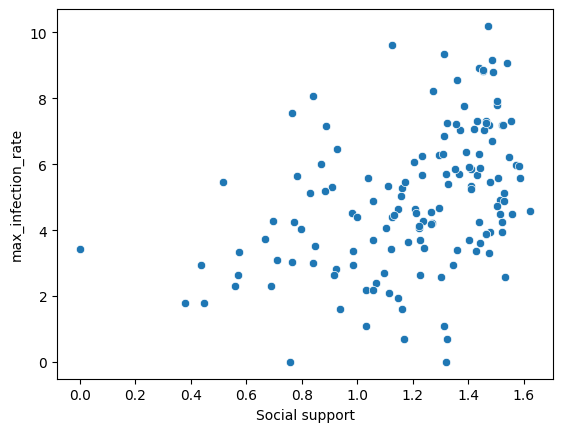

In [34]:
#Plotting Social support vs maximum Infection rate
x=data["Social support"]
y=data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

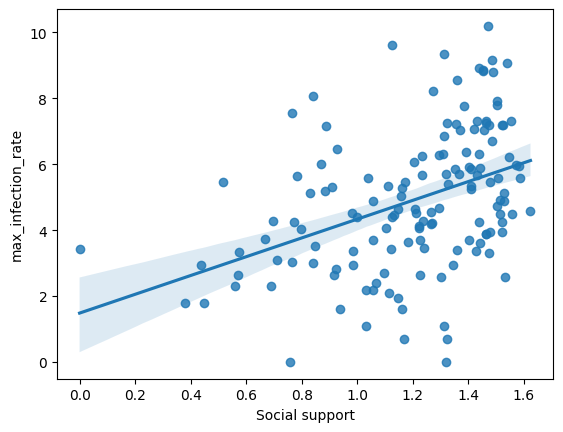

In [35]:
sns.regplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

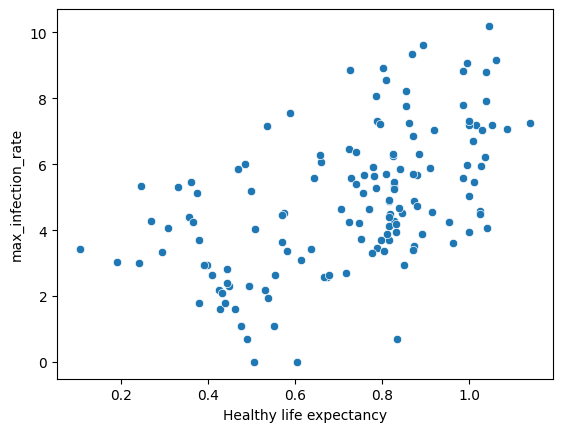

In [36]:
#Plotting Healthy life expectancy vs maximum Infection rate
x=data["Healthy life expectancy"]
y=data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

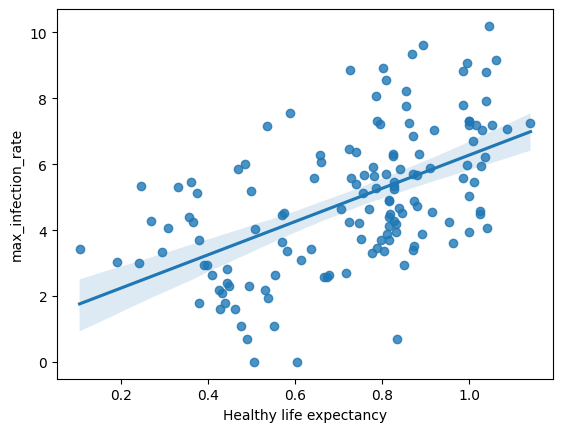

In [37]:
sns.regplot(x=x,y=np.log(y))

Plotting Freedom to make life choices vs maximum Infection rate

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

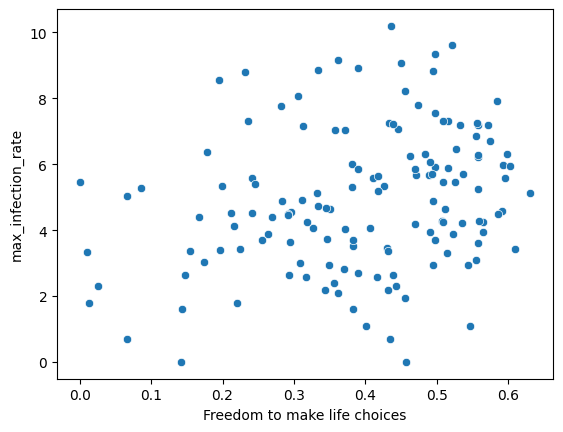

In [39]:
x=data["Freedom to make life choices"]
y=data["max_infection_rate"]
sns.scatterplot(x=x,y=np.log(y))

<Axes: xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

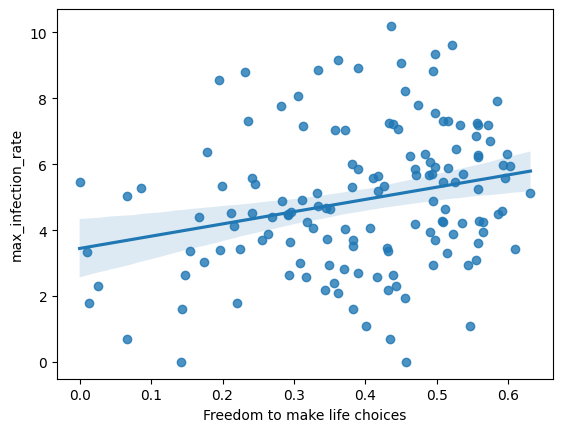

In [40]:
sns.regplot(x=x,y=np.log(y))